# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [136]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name.title()

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 613


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [ ]:
# Set the API base URL
base_url = f"https://api.openweathermap.org/data/2.5/weather?appid={weather_api_key}&units=metric"
limit = 1

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 1

    # Create endpoint URL with each city    
    city_url = f"http://api.openweathermap.org/geo/1.0/direct?q={city}&limit={limit}&appid={weather_api_key}"
    city_response = requests.get(city_url)
    city_json = city_response.json()

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Get coordinates from city name
        lat = city_json[0]['lat']
        lon = city_json[0]['lon']

        # Get weather data for city's coordinates
        coord_weather_url = f"{base_url}&lat={lat}&lon={lon}"
        coord_weather_response = requests.get(coord_weather_url)
    
        # Parse the JSON and retrieve data
        city_weather = coord_weather_response.json()

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather['coord']['lat']
        city_lng = city_weather['coord']['lon']
        city_max_temp = city_weather['main']['temp_max']
        city_humidity = city_weather['main']['humidity']
        city_clouds = city_weather['clouds']['all']
        city_wind = city_weather['wind']['speed']
        city_country = city_weather['sys']['country']
        city_date = pd.to_datetime(city_weather['dt'], unit='s').date()        

        # Append the City information into city_data list
        city_data.append({"City": city_json[0]['name'],
                          "Lat": city_lat,
                          "Lng": city_lng,
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})        

    # If an error is experienced, skip the city
    except:
        print(f"City '{city}' not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | Queenstown
Processing Record 2 of Set 1 | Margaret River
Processing Record 3 of Set 1 | Susuman
Processing Record 4 of Set 1 | Whitehorse
Processing Record 5 of Set 1 | Hermanus
Processing Record 6 of Set 1 | Bonthe
Processing Record 7 of Set 1 | Edinburgh Of The Seven Seas
Processing Record 8 of Set 1 | Anadyr
Processing Record 9 of Set 1 | Thompson
Processing Record 10 of Set 1 | Port-Aux-Francais
Processing Record 11 of Set 1 | Klaksvik
Processing Record 12 of Set 1 | Loukhi
Processing Record 13 of Set 1 | Whakatane
Processing Record 14 of Set 1 | Punta Arenas
Processing Record 15 of Set 1 | Tazovsky
Processing Record 16 of Set 1 | Jamestown
Processing Record 17 of Set 1 | Bilibino
Processing Record 18 of Set 1 | Tongren
Processing Record 19 of Set 1 | Kodiak
Processing Record 20 of Set 1 | Ugoofaaru
City 'Ugoofaaru' not found. Skipping...
Processing Record 21 of Set 1 | Bachatskiy
Processing 

In [9]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          572
Lat           572
Lng           572
Max Temp      572
Humidity      572
Cloudiness    572
Wind Speed    572
Country       570
dtype: int64

In [139]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,Queenstown,-45.0322,168.6610,14.76,68,97,2.29,NZ,2024-11-06
1,Margaret River,-33.9532,115.0769,10.08,74,10,2.79,AU,2024-11-06
2,Susuman,62.7805,148.1536,-34.17,100,93,0.30,RU,2024-11-06
3,Whitehorse,60.7216,-135.0549,2.83,59,75,0.00,CA,2024-11-06
4,Hermanus,-34.4175,19.2361,16.02,77,2,7.23,ZA,2024-11-06


In [140]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [2]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Queenstown,-45.0322,168.6610,14.76,68,97,2.29,NZ,2024-11-06
1,Margaret River,-33.9532,115.0769,10.08,74,10,2.79,AU,2024-11-06
2,Susuman,62.7805,148.1536,-34.17,100,93,0.30,RU,2024-11-06
3,Whitehorse,60.7216,-135.0549,2.83,59,75,0.00,CA,2024-11-06
4,Hermanus,-34.4175,19.2361,16.02,77,2,7.23,ZA,2024-11-06


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

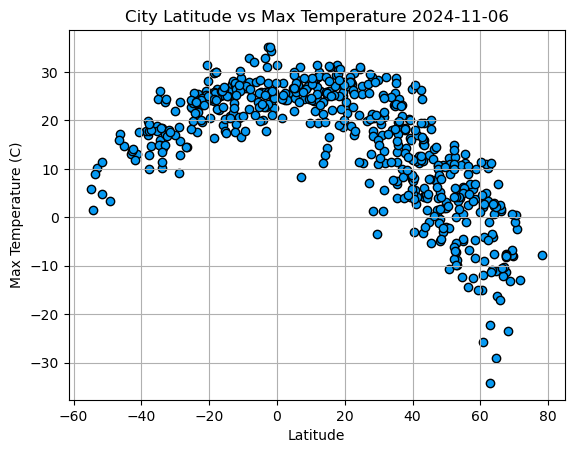

In [3]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df['Lat'], city_data_df['Max Temp'], marker='o', color='#069af3', edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Max Temperature {city_data_df.loc[0,"Date"]}")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig01_Lat_vs_Temp.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

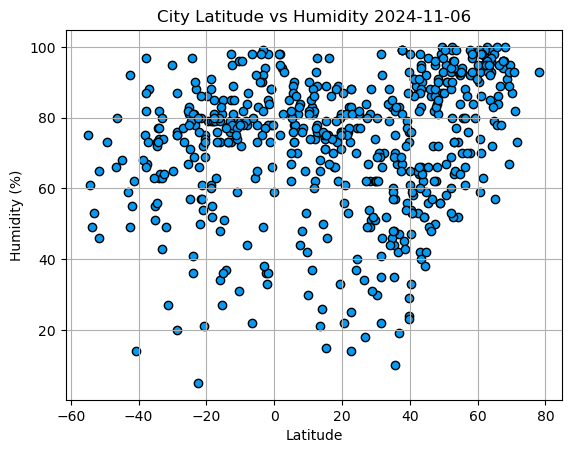

In [4]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df['Lat'], city_data_df['Humidity'], marker='o', color='#069af3', edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Humidity {city_data_df.loc[0,"Date"]}")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig02_Lat_vs_Humid.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

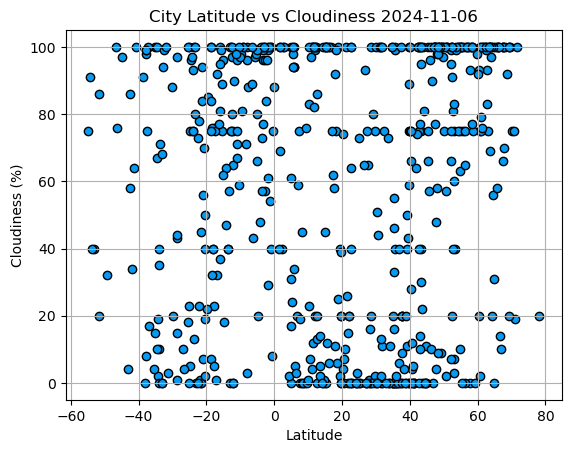

In [5]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df['Lat'], city_data_df['Cloudiness'], marker='o', color='#069af3', edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Cloudiness {city_data_df.loc[0,"Date"]}")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig03_Lat_vs_Cloud.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

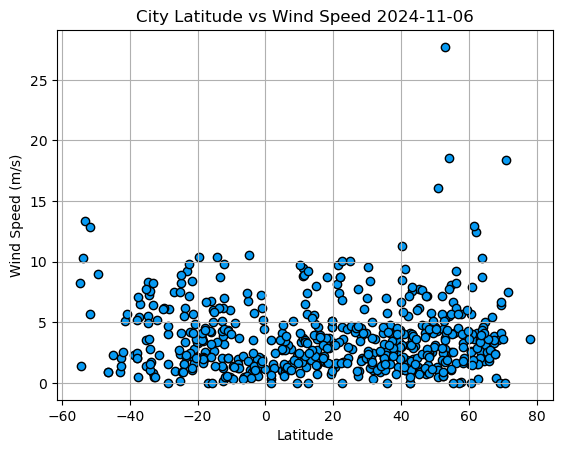

In [6]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df['Lat'], city_data_df['Wind Speed'], marker='o', color='#069af3', edgecolors='black')

# Incorporate the other graph properties
plt.title(f"City Latitude vs Wind Speed {city_data_df.loc[0,"Date"]}")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid()

# Save the figure
plt.savefig("output_data/Fig04_Lat_vs_Wind.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [7]:
# Define a function to create Linear Regression plots
def LinRegressPlot(x_vals, y_vals, txt_loc_tuple, txt_size=16, marker_color='#0485d1', labels=["","",""]):
    plt.scatter(x_vals, y_vals, marker='o', color=marker_color, alpha=1, edgecolors='black')
    (slope, intercept, rvalue, pvalue, stderr) = linregress(x_vals, y_vals)
    r_line = f"y = {round(slope,2)}x + {round(intercept,2)}"
    r_vals = (slope * x_vals) + intercept
    plt.plot(x_vals, r_vals, 'r')
    plt.annotate(r_line, txt_loc_tuple, color='r', size=txt_size)
    plt.title(labels[0])
    plt.xlabel(labels[1])
    plt.ylabel(labels[2])

    return rvalue**2

In [8]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df['Lat'] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
2,Susuman,62.7805,148.1536,-34.17,100,93,0.30,RU,2024-11-06
3,Whitehorse,60.7216,-135.0549,2.83,59,75,0.00,CA,2024-11-06
5,Bonthe,7.5273,-12.5020,26.40,84,0,2.82,SL,2024-11-06
7,Anadyr,64.7317,177.5061,-11.07,79,0,5.00,RU,2024-11-06
8,Thompson,55.7433,-97.8635,-0.90,80,75,4.12,CA,2024-11-06


In [9]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df['Lat'] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,Queenstown,-45.0322,168.6610,14.76,68,97,2.29,NZ,2024-11-06
1,Margaret River,-33.9532,115.0769,10.08,74,10,2.79,AU,2024-11-06
4,Hermanus,-34.4175,19.2361,16.02,77,2,7.23,ZA,2024-11-06
6,Edinburgh of the Seven Seas,-37.0676,-12.3108,14.78,88,17,6.48,SH,2024-11-06
9,Port-aux-Français,-49.3498,70.2200,3.28,73,32,8.98,TF,2024-11-06


###  Temperature vs. Latitude Linear Regression Plot

R-squared = 0.6761238502256157


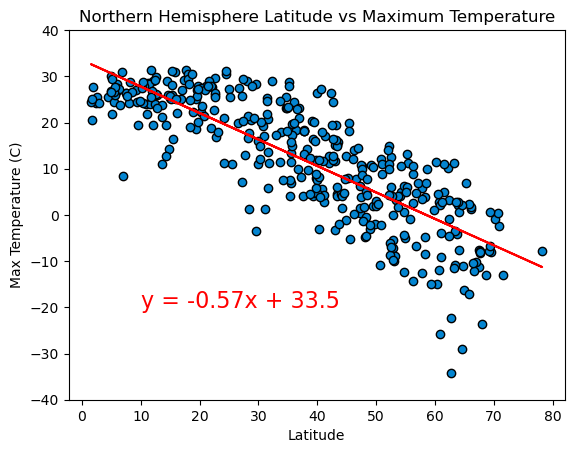

In [10]:
# Linear regression on Northern Hemisphere
r_sq = LinRegressPlot(northern_hemi_df['Lat'], northern_hemi_df['Max Temp'], (10, -20),
                      labels=["Northern Hemisphere Latitude vs Maximum Temperature", "Latitude", "Max Temperature (C)"])
plt.ylim((-40, 40))
print(f"R-squared = {r_sq}")

plt.savefig("output_data/Fig05_LR_Lat_vs_Temp_North.png")

R-squared = 0.5428755675418998


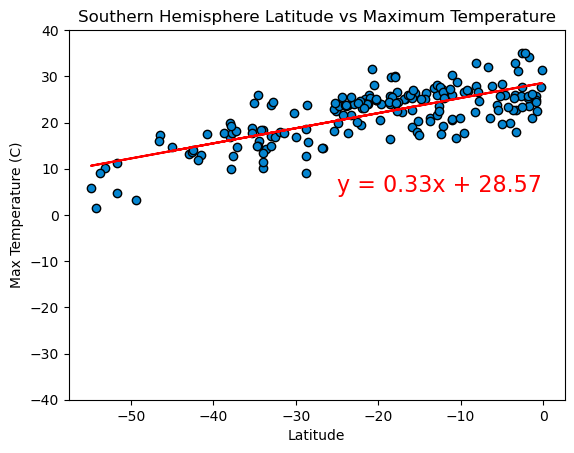

In [11]:
# Linear regression on Southern Hemisphere
r_sq = LinRegressPlot(southern_hemi_df['Lat'], southern_hemi_df['Max Temp'], (-25, 5),
                      labels=["Southern Hemisphere Latitude vs Maximum Temperature", "Latitude", "Max Temperature (C)"])
plt.ylim((-40, 40))
print(f"R-squared = {r_sq}")

plt.savefig("output_data/Fig06_LR_Lat_vs_Temp_South.png")

**Discussion about the linear relationship:**  
  
The first graph shows a negative correlation between latitude and maximum temperature, while the second graph shows a positive correlation between the two variables. In other words, maximum temperature tends to increase as latitude approaches 0 (the Equator). The regression lines are only moderately useful, however, as the sample from the northern hemisphere has R<sup>2</sup>=0.676, and for the southern hemisphere, R<sup>2</sup>=0.542. So while these regression lines are not particularly bad fits, they are not particularly good, either. For the northern hemisphere, the sample generally follows the direction of the regression line, and many points sit close to it. But many others have greater variability above and below the line. This is true for the southern hemisphere as well. Thus, we can say that on average, latitudes closer to the Equator will have higher maximum temperatures, and the linear models may get close predictions, but will be imprescise because other factors not considered here contribute substantially to maximum temperature.

### Humidity vs. Latitude Linear Regression Plot

R-squared = 0.07285220744077199


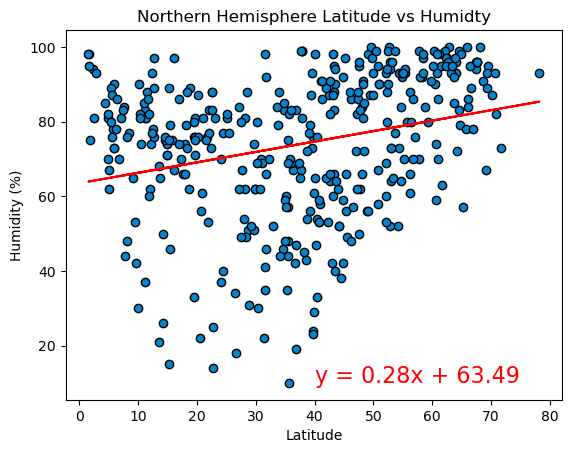

In [12]:
# Northern Hemisphere
r_sq = LinRegressPlot(northern_hemi_df['Lat'], northern_hemi_df['Humidity'], (40, 10),
                      labels=["Northern Hemisphere Latitude vs Humidty","Latitude","Humidity (%)"])
print(f"R-squared = {r_sq}")

plt.savefig("output_data/Fig07_LR_Lat_vs_Humid_North.png")

R-squared = 0.03448138976070082


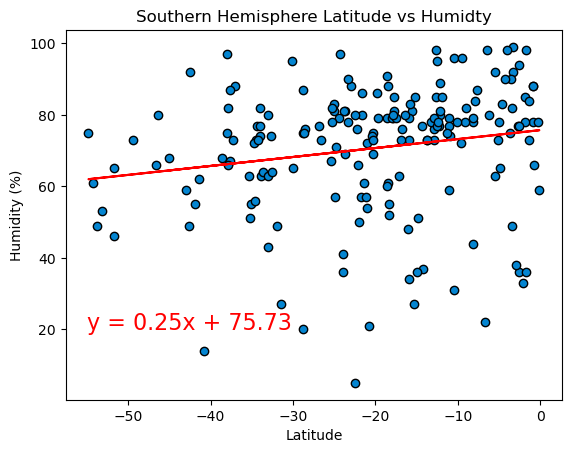

In [13]:
# Southern Hemisphere
r_sq = LinRegressPlot(southern_hemi_df['Lat'], southern_hemi_df['Humidity'], (-55, 20),
                      labels=["Southern Hemisphere Latitude vs Humidty","Latitude","Humidity (%)"])
print(f"R-squared = {r_sq}")

plt.savefig("output_data/Fig08_LR_Lat_vs_Temp_South.png")

**Discussion about the linear relationship:**  
  
These graphs show the relationship between latitude and humidity, with a very weak correlation. For the northern hemisphere sample, the plot does appear to suggest some positive correlation between the two variables, but with R<sup>2</sup>=0.072, the data does not fit the linear model well at all. Thus, the regression line is a poor predictor of humidity based on latitude. If anything, the graph shows less variation in humidity as latitude increases, but there is no linearity to the data. For the southern hemisphere, the data is even less focused around the regression line, with R<sup>2</sup>=0.034. Without the presence of the regression line on the graph, it is unlikely any pattern would be visually discerned.

### Cloudiness vs. Latitude Linear Regression Plot

R-squared = 0.07246957988746511


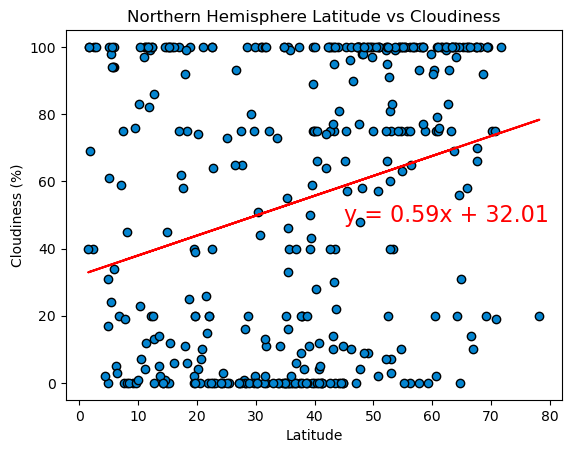

In [14]:
# Northern Hemisphere
r_sq = LinRegressPlot(northern_hemi_df['Lat'], northern_hemi_df['Cloudiness'], (45, 48),
                      labels=["Northern Hemisphere Latitude vs Cloudiness","Latitude","Cloudiness (%)"])
print(f"R-squared = {r_sq}")

plt.savefig("output_data/Fig09_LR_Lat_vs_Cloud_North.png")

R-squared = 0.05249319449097661


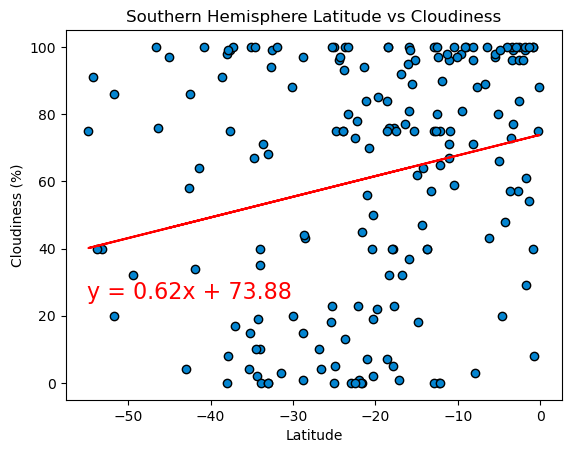

In [15]:
# Southern Hemisphere
r_sq = LinRegressPlot(southern_hemi_df['Lat'], southern_hemi_df['Cloudiness'], (-55, 25),
                      labels=["Southern Hemisphere Latitude vs Cloudiness","Latitude","Cloudiness (%)"])
print(f"R-squared = {r_sq}")

plt.savefig("output_data/Fig10_LR_Lat_vs_Cloud_South.png")

**Discussion about the linear relationship:**  
  
These graphs compare the relationship between latitude and cloudiness. With the high variation in values shown in both graphs, it is no surprise that R<sup>2</sup> for the northern and southern hemispheres are very low, at 0.072 and 0.052, respectively. There is no obvious pattern in either graph, let alone a linear relationship. If anything, there appears to be greater clustering of data at the extremes (0 and 100), far away from the regression lines. Thus, these regression equations are bad fits for the data and cannot be reliably used to predict the cloudiness of a given city.

### Wind Speed vs. Latitude Linear Regression Plot

R-squared = 0.012910204003304816


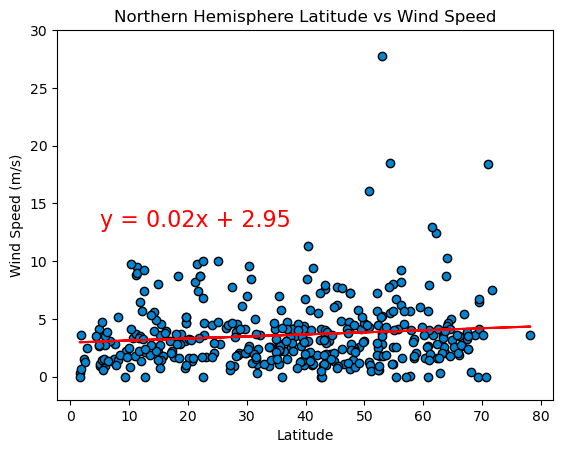

In [16]:
# Northern Hemisphere
r_sq = LinRegressPlot(northern_hemi_df['Lat'], northern_hemi_df['Wind Speed'], (5, 13),
                      labels=["Northern Hemisphere Latitude vs Wind Speed","Latitude","Wind Speed (m/s)"])
plt.ylim((-2, 30))
print(f"R-squared = {r_sq}")

plt.savefig("output_data/Fig11_LR_Lat_vs_Wind_North.png")

R-squared = 0.06806104488343565


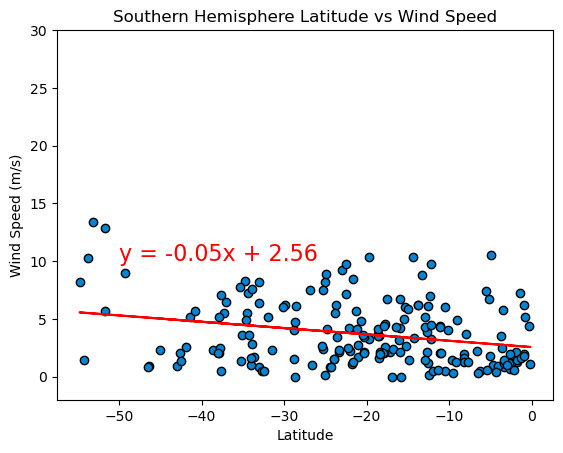

In [17]:
# Southern Hemisphere
r_sq = LinRegressPlot(southern_hemi_df['Lat'], southern_hemi_df['Wind Speed'], (-50, 10),
                      labels=["Southern Hemisphere Latitude vs Wind Speed","Latitude","Wind Speed (m/s)"])
plt.ylim((-2, 30))
print(f"R-squared = {r_sq}")

plt.savefig("output_data/Fig12_LR_Lat_vs_Wind_South.png")

**Discussion about the linear relationship:**  
  
These final two graphs compare the relationship between latitude and wind speed. Here we have an interesting circumstance. In both hemispheres, the data points are heavily clustered around the regression line between 0 and 10 m/s, but in the northern hemisphere, R<sup>2</sup>=0.013. This is the lowest of all the regression graphs, including the wind speed for the southern hemisphere, with R<sup>2</sup>=0.068. This is because the northern hemisphere graph appears more concentrated due to more data points, but few of those data points follow the regression line. Furthermore, the northern hemisphere has data points with much greater variability, up to around 28 m/s. The southern hemisphere does not exhibit such extreme values, but again, few of the data points follow the regression line. Therefore, latitude is not a good predictor of wind speed and these regression equations are unreliable.